In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tqdm.auto import tqdm

from simulator import *

In [14]:
plt.rcParams['figure.figsize'] = [15, 10]

In [15]:
catalog_size = 50
trace = [r for i in range(100) for r in range(catalog_size)]
sample_size = len(trace)
cache_size = 5
cache_init = np.arange(5)

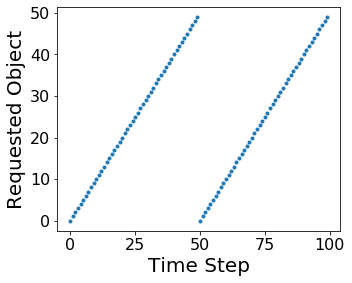

In [16]:
set_fig_halfwidth()
plt.plot(trace[:100], '.')
plt.ylabel("Requested Object")
plt.xlabel("Time Step")
plt.gcf().savefig("./figures/ranking_expert_selection_input.pdf")

In [17]:
cache_BH = CacheStatic(cache_size, catalog_size, gen_best_static(trace, cache_size))

# rankStatic1_init = lambda cache_size, catalog_size, cache_init: RankStatic(cache_size, catalog_size, np.array([0,1,2,3,49]))
# rankStatic2_init = lambda cache_size, catalog_size, cache_init: RankStatic(cache_size, catalog_size, np.arange(5)+10)

# ranking_expert_policies = (rankStatic1_init, rankStatic2_init)

cache_DiscreteOGA1 = DiscreteOGA(cache_size, catalog_size, sample_size, np.array([0,1,2,3,20]))
cache_DiscreteOGA1.name = "Expert 1"
cache_DiscreteOGA2 = DiscreteOGA(cache_size, catalog_size, sample_size, np.arange(5)+10)
cache_DiscreteOGA2.name = "Expert 2"

RankOGA1_init = lambda cache_size, catalog_size, cache_init : RankOGA(cache_size, catalog_size, np.array([0,1,2,3,20]), sample_size=sample_size)
RankOGA1_init.name = "Integral OGA 1"
RankOGA2_init = lambda cache_size, catalog_size, cache_init : RankOGA(cache_size, catalog_size, np.arange(5)+10, sample_size=sample_size)
RankOGA2_init.name = "Integral OGA 2"

ranking_expert_policies = (RankOGA1_init, RankOGA2_init)
cache_ranking_experts_FTL = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies, alg="FTL", eps=1/np.e, mixing=False)
cache_ranking_experts_RWM = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies, alg="RWM", eps=1/np.e, mixing=False)
cache_ranking_experts_SD = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies, alg="SD", eps=1/np.e, mixing=False)
cache_ranking_experts_FTPL = RankingExperts(cache_size, catalog_size, cache_init, ranking_expert_policies, alg="FTPL", eps=1/np.e, mixing=False)



In [18]:
simulate_caches((cache_BH, cache_ranking_experts_FTL, cache_ranking_experts_RWM, cache_ranking_experts_SD, cache_DiscreteOGA1, cache_DiscreteOGA2, cache_ranking_experts_FTPL), trace)

  0%|          | 0/5000 [00:00<?, ?it/s]

(<simulator.cache.CacheStatic at 0x7f8431e4e510>,
 <simulator.experts2.RankingExperts at 0x7f8431dabfd0>)

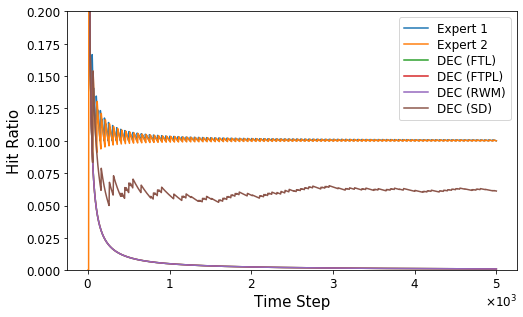

In [26]:
set_fig_fullwidth(scale=1.5)
# set_fig_halfwidth()

plot_comp(\
          cache_DiscreteOGA1,\
          cache_DiscreteOGA2,\
#           cache_BH,\
          cache_ranking_experts_FTL,\
          cache_ranking_experts_FTPL,\
          cache_ranking_experts_RWM,\
          cache_ranking_experts_SD,\
         )
plt.ylim([0,0.2])
plt.gcf().savefig("./figures/ranking_expert_selection_trace.pdf")

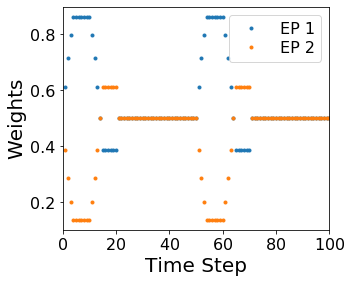

In [25]:
# %matplotlib inline
set_fig_halfwidth()
# set_fig_fullwidth(scale=1.5)

cache_ranking_experts_FTL.experts[0].name = "EP 1"
cache_ranking_experts_FTL.experts[1].name = "EP 2"
cache_ranking_experts_FTL.plot_expert_weights()
plt.legend(["EP 1", "EP 2"], loc="best")
plt.ticklabel_format(axis="x", style="plain")
# plt.plot(cache_ranking_experts_WM.expert_choices[:100],'x')
# plt.plot(cache_ranking_experts_RWM.expert_choices[:100],'o')
# plt.plot(cache_ranking_experts_SD.expert_choices,'x')
plt.xlim([0,100])
plt.gcf().savefig("./figures/ranking_expert_selection_weights.pdf")

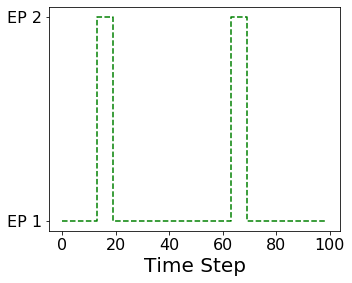

In [21]:
set_fig_halfwidth()

plt.plot(cache_ranking_experts_FTL.expert_choices[:100], 'g--',drawstyle='steps-pre')
plt.yticks([0,1],["EP 1", "EP 2"])
plt.xlabel("Time Step")
plt.gcf().savefig("./figures/ranking_expert_selection_FTL.pdf")

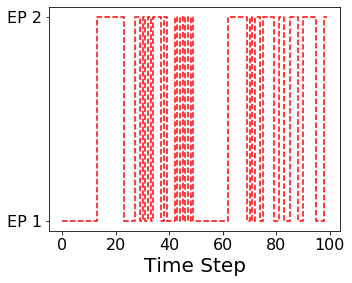

In [22]:
plt.plot(cache_ranking_experts_FTPL.expert_choices[:100], '--',color='red', drawstyle='steps-pre')
plt.yticks([0,1],["EP 1", "EP 2"])
plt.xlabel("Time Step")
plt.gcf().savefig("./figures/ranking_expert_selection_FTPL.pdf")

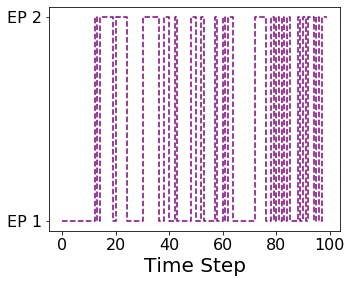

In [23]:
set_fig_halfwidth()

plt.plot(cache_ranking_experts_RWM.expert_choices[:100], '--', color='purple',drawstyle='steps-pre')
plt.yticks([0,1],["EP 1", "EP 2"])
plt.xlabel("Time Step")
plt.gcf().savefig("./figures/ranking_expert_selection_RWM.pdf")

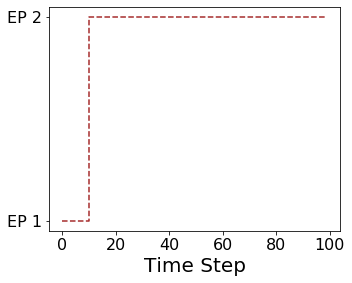

In [24]:
set_fig_halfwidth()

plt.plot(cache_ranking_experts_SD.expert_choices[:100], '--',color='brown', drawstyle='steps-pre')
plt.yticks([0,1],["EP 1", "EP 2"])
plt.xlabel("Time Step")
plt.gcf().savefig("./figures/ranking_expert_selection_SD.pdf")